# Visualization of Thomas Fire Impact on Air and Land Quality in Santa Barbara

Amanda Herbst

**Link to GitHub repository:** https://github.com/amandaherbst/eds220-thomas-fire

### Purpose
The Thomas fire was a huge wildfire that burned a large part of Santa Barbara and Ventura counties during December 2017, and was the largest recorded California wildfire at the time. The following analysis gives insight on the drastic impacts it had on the local air quality, as well as the land area it burned.
### Highlights of Analysis
- Fetch vector data from an online repository
- Time series analysis
- Visualize raster data
- False color imagery
### Dataset Description

**(1) Air Quality Index (AQI)**

Outdoor daily air quality measurements in Santa Barbara County in 2017 and 2018 were retrieved from the US Environmental Protection Agency.

**(2) Landsat raster data**

A simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite. The data was accessed and pre-processed in the Microsoft Planetary Computer to remove data outside land and coarsen the spatial resolution ([Landsat Collection in MPC](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2)). Data should be used for visualization purposes only. 


**(3) Fire Perimeters**

A shapefile of fire perimeters in California during 2017, from the CA state geoportal. 

### Dataset References
- [US EPA Daily AQI Data](https://www.epa.gov/outdoor-air-quality-data) Accessed Oct 25, 2023
- [Landsat 8 satellite surface reflectance data, from MPC Landsat collection](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2) Accessed Nov 28, 2023
- [2017 CA fire perimeter shapefile](https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about) Accessed November 28, 2023

## Import Libraries and Functions

In [1]:
# import libraries
import os
import pandas as pd
import xarray as xr
import numpy as np

import geopandas as gpd
import rioxarray as rioxr
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

## Import Data

In [2]:
# read in 2017 and 2018 air quality data
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')

# import landsat raster data by calling a filepath
landsat = rioxr.open_rasterio(os.path.join(os.getcwd(),'data', 'landsat8-2018-01-26-sb-simplified.nc'))

# import ca fire perimeters
ca_fire = gpd.read_file('data/California_Fire_Perimeters_2017/California_Fire_Perimeters_2017.shp')

## Geographical context of data

Santa Barbara county is located on the coast of Southern California (coordinates: 34.6099° N, 120.0665° W) and has a Mediterranean biome that has recently experienced prolonged droughts and is prone to wildfires. 

## Data Exploration

Take a look at the initial data:

In [3]:
# look at aqi 2017 dataframe
aqi_17.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,21,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,22,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,19,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,30,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,16,Good,PM2.5,01-003-0010,1


In [4]:
# look at aqi 2018 dataframe
aqi_18.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2018-01-02,32,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2018-01-05,34,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2018-01-08,15,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2018-01-11,19,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2018-01-14,25,Good,PM2.5,01-003-0010,1


In [5]:
# look at raster data
landsat

<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

In [6]:
# look at ca_fire head
ca_fire.head()

,index,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,...,GIS_ACRES,COMMENTS,COMPLEX_NA,COMPLEX_IN,IRWINID,FIRE_NUM,DECADES,SHAPE_Leng,SHAPE_Area,geometry
0,19836,41429,2017,CA,CCO,VNC,BROOK,00042450,2017-05-23,2017-05-24,...,10.043819,per walked track,None,None,None,None,2010,1246.055781,59473.666651,"POLYGON ((-13229812.974 4046876.486, -13229786..."
1,19837,41430,2017,CA,CCO,VNC,PACIFIC,00075307,2017-09-09,2017-09-09,...,1.190109,Final Walked track. Small spot to the north east,None,None,None,None,2010,561.418202,7081.369481,"POLYGON ((-13286872.985 4074523.355, -13286895..."
2,19838,41431,2017,CA,CCO,VNC,GRADE,00054660,2017-07-04,2017-07-05,...,47.194027,None,None,None,None,None,2010,2587.259697,279911.825212,"POLYGON ((-13244637.580 4056332.530, -13244620..."
3,19839,41432,2017,CA,CCO,VNC,PACIFICA,00051791,2017-06-24,2017-06-24,...,1.158548,GPS track,None,None,None,None,2010,501.178102,6859.664843,"POLYGON ((-13229521.754 4046254.111, -13229510..."
4,19840,41433,2017,CA,CCO,VNC,MONTVIEW,00040196,2017-05-15,2017-05-15,...,2.893327,Rough per description. waiting for walked GPS...,None,None,None,None,2010,484.388887,17133.006159,"POLYGON ((-13229663.036 4046858.853, -13229667..."


**Additional preliminary exploration:**

In [7]:
# check dimensions of air quality data 
print("AQI 2017 dims: ", aqi_17.shape)
print("AQI 2018 dims: ", aqi_18.shape)

AQI 2017 dims:  (326801, 10)
AQI 2018 dims:  (327537, 10)


In [8]:
# check crs for raster and shapefile data
print('landsat CRS:', landsat.rio.crs)
print('CA Fire Perimeter CRS:', ca_fire.crs)

landsat CRS: EPSG:32611
CA Fire Perimeter CRS: epsg:3857


<AxesSubplot:>

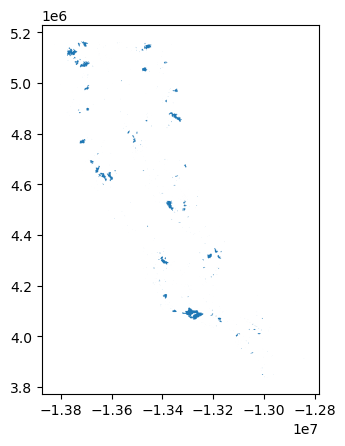

In [9]:
# plot ca fires
ca_fire.plot()

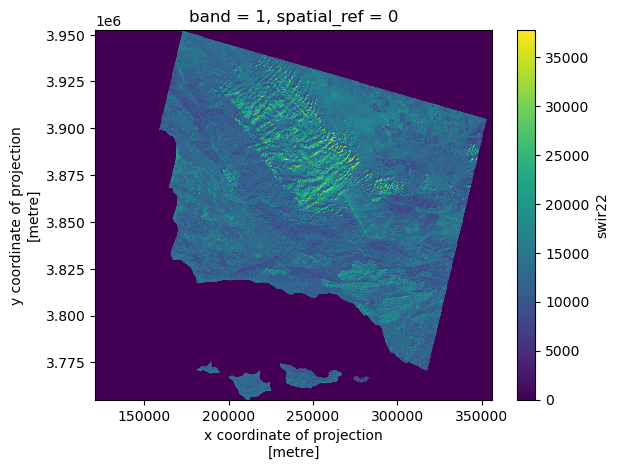

In [10]:
# plot a band in landsat
landsat['swir22'].plot()

## Analysis
- Include subsections as necessary to guide reader through your analysis
- Include checks to see operations worked
- Checks must be short and informative: print specific attributes instead of running df.head() or printing entire objects.

### Air Quality Data Preparation

In [11]:
# join the aqi datasets together
aqi = pd.concat([aqi_17, aqi_18])

# check dimensions to make verify concatenation
aqi.shape

(654338, 10)

In [12]:
# tidy aqi column names
aqi.columns = aqi.columns.str.lower().str.replace(' ','_')
# filter by county name, and then only keep necessary columns
aqi_sb = aqi[aqi.county_name == 'Santa Barbara'].loc[:,'date':'number_of_sites_reporting']
# verify selected columns and tidy format
aqi_sb.columns

Index(['date', 'aqi', 'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object')

In [13]:
# convert date column from string to timestamps
aqi_sb.date = pd.to_datetime(aqi_sb.date)

# check column data types to verify datetime conversion
aqi_sb.dtypes

date                         datetime64[ns]
aqi                                   int64
category                             object
defining_parameter                   object
defining_site                        object
number_of_sites_reporting             int64
dtype: object

In [14]:
# set the date column to be the index
aqi_sb = aqi_sb.set_index('date')
# check dtype of index to verify
type(aqi_sb.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [15]:
# create new column to store the rolling 5 day averages of AQI
aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean()

### Raster and Shapefile Data Preparation

In [16]:
# drop extra dimension 
landsat = landsat.squeeze().drop('band')
# verify only x and y dimension and coordinates
print(landsat.dims, landsat.coords)

Frozen({'y': 731, 'x': 870}) Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    spatial_ref  int64 0


In [17]:
# update ca_fire column names to lowercase
ca_fire.columns = ca_fire.columns.str.lower()

In [18]:
# Reproject shapefile to raster CRS for plotting
ca_fire = ca_fire.to_crs(landsat.rio.crs)
# verify reprojection
ca_fire.crs == landsat.rio.crs

True

In [19]:
# select thomas fire from ca fire perimeters for easier plotting
thomas = ca_fire[ca_fire.fire_name == "THOMAS"]
# verify only thomas fire selected
thomas.fire_name.unique()

array(['THOMAS'], dtype=object)

## Final output

### Air Quality Index

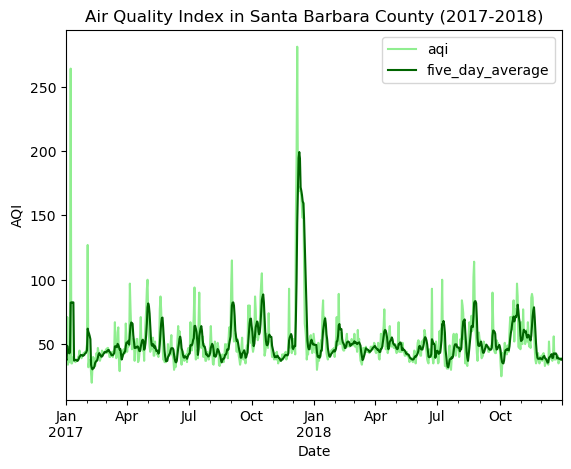

In [20]:
# plot daily AQI and 5-day average with updated labels, title, and colors
aqi_sb.plot(y = ['aqi', 'five_day_average'],
            xlabel = 'Date',
            ylabel = 'AQI',
            color = {'aqi':'lightgreen',
                    'five_day_average':'darkgreen'},
            title = 'Air Quality Index in Santa Barbara County (2017-2018)')
plt.show()

### Thomas Fire Perimeter and Burn Scar

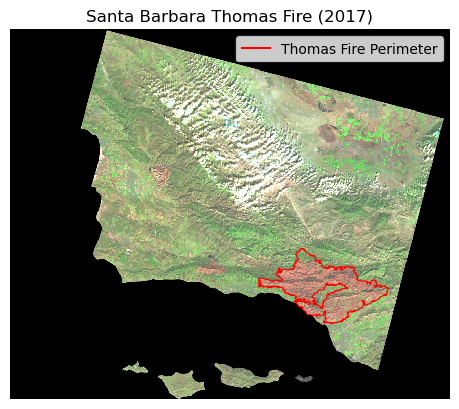

In [21]:
# map false color image with thomas fire perimeter
fig, ax = plt.subplots()

# plot false color image
landsat[['swir22','nir08','red']].to_array().plot.imshow(robust = True,
                                                        ax = ax)
# plot thomas fire perimeter in red
thomas.boundary.plot(ax = ax,
            color = "red",
                    linewidth = 0.8)
# create thomas fire patch for legend
thomas_patch = mlines.Line2D([],[],
                             color = "red",
                             linestyle = "-",
                             label = "Thomas Fire Perimeter")

# add legend to label thomas fire perimeter
ax.legend(handles = [thomas_patch], 
          frameon = True,
         loc = 'upper right')

# add map title
plt.title('Santa Barbara Thomas Fire (2017)')

# turn off axes
ax.axis('off')

plt.show()